In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Users\ELCOT\Downloads\New folder\MonthWiseMarketArrivals_Clean.csv")
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [4]:
df.date = pd.DatetimeIndex(df.date)

In [5]:
df.index = pd.PeriodIndex(df.date, freq="M")
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
2005-01,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,2005-01-01
2006-01,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,2006-01-01
2010-01,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01
2011-01,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,2011-01-01
2012-01,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,2012-01-01


## ANS for QN 1

### Onion price in umbai

In [7]:
df_bang = df.loc[df.city == "MUMBAI"].copy()
df_bang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
2004-01,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,2004-01-01
2005-01,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI,2005-01-01
2006-01,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI,2006-01-01
2007-01,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI,2007-01-01
2008-01,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI,2008-01-01


In [8]:
df_bang = df_bang.drop(["market","month","year","priceMin","priceMax","state","city"], axis=1)
df_bang.columns

Index(['quantity', 'priceMod', 'date'], dtype='object')

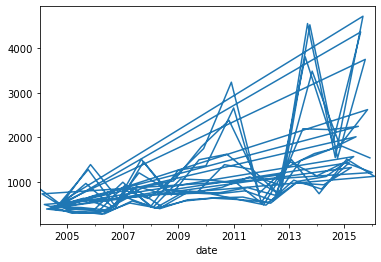

In [9]:
df_bang.priceMod.plot()
plt.show()

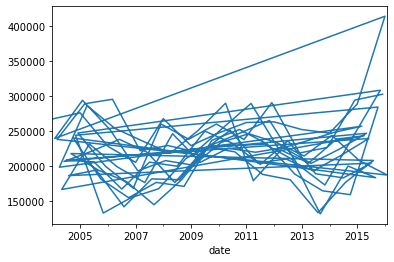

In [10]:
df_bang.quantity.plot()
plt.show()

<AxesSubplot:ylabel='Frequency'>

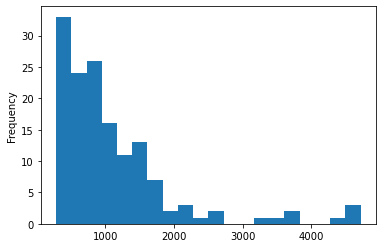

In [11]:
df_bang.priceMod.plot(kind="hist", bins=20)

## ANS for QN 2 
# Basic Time Series Models

In [13]:
df_bang["log_priceMod"] = np.log(df_bang.priceMod)

In [14]:
df_bang_mean = df_bang.log_priceMod.mean()
df_bang["mean_price"] = np.exp(df_bang_mean)
df_bang.head()

,quantity,priceMod,date,log_priceMod,mean_price
date,,,,,
2004-01,267100,849,2004-01-01,6.744059,889.100239
2005-01,275845,387,2005-01-01,5.958425,889.100239
2006-01,228000,402,2006-01-01,5.996452,889.100239
2007-01,205200,997,2007-01-01,6.904751,889.100239
2008-01,267550,448,2008-01-01,6.104793,889.100239


# RMSE

In [15]:
def RMSE(actual, predicted):
    mse = (actual - predicted)**2
    rmse = np.sqrt(mse.sum()/mse.count())
    return rmse

In [16]:
mean_modelRMSE = RMSE(df_bang.priceMod, df_bang.mean_price)
mean_modelRMSE

908.4772843986449

In [18]:
# Converting the date into datetinme delta starting from 0
df_bang["timeindex"] = df_bang.date - df_bang.date.min()
df_bang.head()

,quantity,priceMod,date,log_priceMod,mean_price,timeindex
date,,,,,,
2004-01,267100,849,2004-01-01,6.744059,889.100239,0 days
2005-01,275845,387,2005-01-01,5.958425,889.100239,366 days
2006-01,228000,402,2006-01-01,5.996452,889.100239,731 days
2007-01,205200,997,2007-01-01,6.904751,889.100239,1096 days
2008-01,267550,448,2008-01-01,6.104793,889.100239,1461 days


In [19]:
df_bang.dtypes

quantity                  int64
priceMod                  int64
date             datetime64[ns]
log_priceMod            float64
mean_price              float64
timeindex       timedelta64[ns]
dtype: object

In [20]:
df_bang["timeindex"] = df_bang["timeindex"]/np.timedelta64(1,"M")

In [21]:
df_bang["timeindex"] = df_bang["timeindex"].round(0).astype(int)
df_bang.tail()

,quantity,priceMod,date,log_priceMod,mean_price,timeindex
date,,,,,,
2011-12,290350,749,2011-12-01,6.618739,889.100239,95
2012-12,218500,1330,2012-12-01,7.192934,889.100239,107
2013-12,226385,1639,2013-12-01,7.401842,889.100239,119
2014-12,294150,1802,2014-12-01,7.496652,889.100239,131
2015-12,302409,1542,2015-12-01,7.340836,889.100239,143


In [22]:
linear_model = smf.ols('log_priceMod ~ timeindex', data = df_bang).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log_priceMod   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     129.3
Date:                Sat, 21 May 2022   Prob (F-statistic):           8.89e-22
Time:                        21:42:46   Log-Likelihood:                -96.121
No. Observations:                 146   AIC:                             196.2
Df Residuals:                     144   BIC:                             202.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0284      0.078     77.785      0.000       5.875       6.182
timeindex      0.0105      0.001     11.370      0.000       0.009       0.012
==============================================================================
Omnibus:                        7.658   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                8.054
Skew:                           0.566   Prob(JB):                       0.0178
Kurtosis:                       2.791   Cond. No.                         167.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
linear_model_pred = linear_model.predict()
linear_model_pred

array([6.02841087, 6.15450176, 6.28059265, 6.40668353, 6.53277442,
       6.65886531, 6.7849562 , 6.91104708, 7.03713797, 7.16322886,
       7.28931975, 7.41541064, 7.54150152, 6.03891844, 6.16500933,
       6.29110022, 6.41719111, 6.543282  , 6.66937288, 6.79546377,
       6.92155466, 7.04764555, 7.17373643, 7.29982732, 7.42591821,
       7.5520091 , 6.04942602, 6.17551691, 6.30160779, 6.42769868,
       6.55378957, 6.67988046, 6.80597134, 6.93206223, 7.05815312,
       7.18424401, 7.3103349 , 7.43642578, 6.05993359, 6.18602448,
       6.31211537, 6.43820626, 6.56429714, 6.69038803, 6.81647892,
       6.94256981, 7.06866069, 7.19475158, 7.32084247, 7.44693336,
       6.07044117, 6.19653205, 6.32262294, 6.44871383, 6.57480472,
       6.70089561, 6.82698649, 6.95307738, 7.07916827, 7.20525916,
       7.33135004, 7.45744093, 6.08094874, 6.20703963, 6.33313052,
       6.4592214 , 6.58531229, 6.71140318, 6.83749407, 6.96358495,
       7.08967584, 7.21576673, 7.34185762, 7.46794851, 6.09145

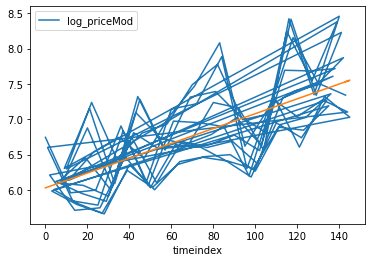

In [24]:
df_bang.plot(kind = "line", x="timeindex", y="log_priceMod")
plt.plot(df_bang.timeindex, linear_model_pred)

<AxesSubplot:xlabel='date'>

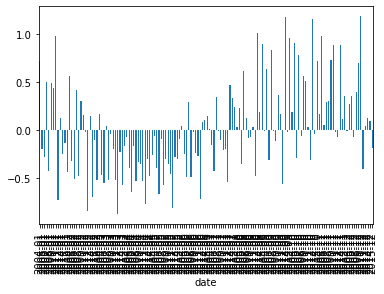

In [25]:
linear_model.resid.plot(kind="bar")

In [27]:
df_bang["linear_price"] = np.exp(linear_model_pred)
linear_model_RMSE = RMSE(df_bang.priceMod, df_bang.linear_price)
linear_model_RMSE

724.707331417877

In [28]:
linear_model_quant = smf.ols('log_priceMod ~ timeindex + np.log(quantity)', data = df_bang).fit()
linear_model_quant.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log_priceMod   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     77.15
Date:                Sat, 21 May 2022   Prob (F-statistic):           1.88e-23
Time:                        21:45:18   Log-Likelihood:                -89.461
No. Observations:                 146   AIC:                             184.9
Df Residuals:                     143   BIC:                             193.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           15.2955      2.508      6.097      0.000      10.337      20.254
timeindex            0.0109      0.001     12.216      0.000       0.009       0.013
np.log(quantity)    -0.7562      0.205     -3.696      0.000      -1.161      -0.352
==============================================================================
Omnibus:                        4.787   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.091   Jarque-Bera (JB):                4.880
Skew:                           0.429   Prob(JB):                       0.0872
Kurtosis:                       2.742   Cond. No.                     5.70e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

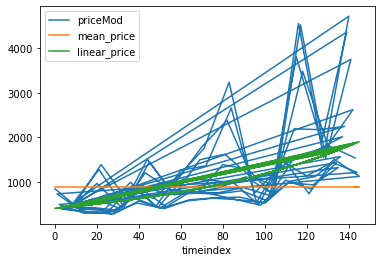

In [30]:
df_bang.plot(kind="line", x="timeindex", y = ["priceMod", "mean_price", 
                                             "linear_price"])
plt.show()

In [31]:
df_bang["shift_log_priceMod"] = df_bang.log_priceMod.shift()

<AxesSubplot:xlabel='shift_log_priceMod', ylabel='log_priceMod'>

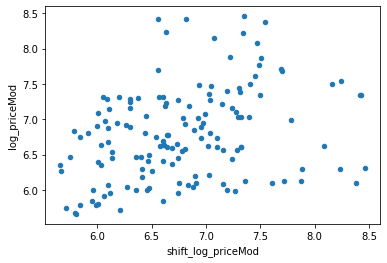

In [32]:
df_bang.plot(kind="scatter", x="shift_log_priceMod", y ="log_priceMod", s=20 )


#  QN 3---ACF AND PACF

In [39]:
df_bang["log_priceMod_diff"] = df_bang.log_priceMod - df_bang.shift_log_priceMod
ts = df_bang.log_priceMod_diff
ts.dropna(inplace = True)

ts = df_bang.log_priceMod
ts_diff = df_bang.log_priceMod_diff
ts_diff.dropna(inplace = True)

In [40]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_diff, nlags=20)
lag_acf

array([ 1.        , -0.54612312,  0.35974009, -0.48269918,  0.31064144,
       -0.28581108,  0.25488628, -0.17927192,  0.20121241, -0.38328221,
        0.23712336, -0.33378314,  0.65536578, -0.26709031,  0.18329631,
       -0.31617105,  0.16054614, -0.14311553,  0.12853298, -0.08896203,
        0.17512094])

<AxesSubplot:>

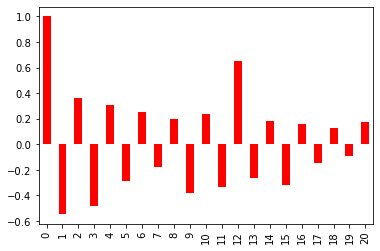

In [41]:
ACF = pd.Series(lag_acf)
ACF.plot(kind="bar", color="red")

<AxesSubplot:>

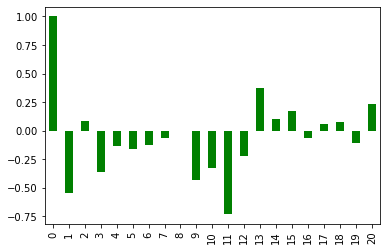

In [42]:
lag_pacf = pacf(ts_diff, nlags=20, method='ols')
PACF = pd.Series(lag_pacf)
PACF.plot(kind="bar", color="green")

# ARIMA model

In [43]:
from statsmodels.tsa.arima_model import ARIMA

In [44]:
ts_diff.head()

date
2005-01   -0.785634
2006-01    0.038027
2007-01    0.908299
2008-01   -0.799958
2009-01    1.038824
Freq: M, Name: log_priceMod_diff, dtype: float64

In [45]:
ARIMA_model = ARIMA(ts_diff, order=(1,0,1))
ARIMA_result = ARIMA_model.fit(disp = -1)
ARIMA_result.fittedvalues.head()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'


date
2005-01    0.004969
2006-01    0.333422
2007-01    0.218657
2008-01   -0.375152
2009-01    0.215032
Freq: M, dtype: float64

<AxesSubplot:xlabel='date'>

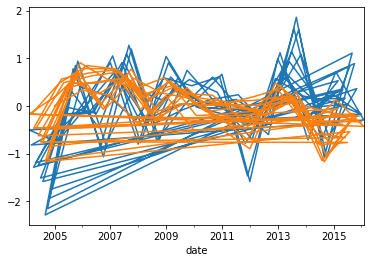

In [46]:
ts_diff.plot()
ARIMA_result.fittedvalues.plot()